In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')
sns.set(style="whitegrid")
#pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
events = pd.read_csv('data/events.csv', low_memory=False)

In [3]:
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(events.shape)

(1011288, 23)


In [5]:
print(events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [6]:
event_types = events['event']

In [7]:
event_types.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [8]:
events['timestamp'] = pd.to_datetime(events['timestamp'])
events['month'] = events['timestamp'].dt.month

In [9]:
events['month'].value_counts()

5    474949
6    281882
4    130008
3     77293
2     27886
1     19270
Name: month, dtype: int64

In [10]:
events.index

RangeIndex(start=0, stop=1011288, step=1)

In [11]:
events.set_index('event', inplace=True)

In [12]:
events.index

Index([u'ad campaign hit', u'visited site', u'viewed product', u'checkout',
       u'viewed product', u'visited site', u'ad campaign hit', u'checkout',
       u'generic listing', u'visited site',
       ...
       u'ad campaign hit', u'generic listing', u'searched products',
       u'viewed product', u'viewed product', u'checkout', u'visited site',
       u'ad campaign hit', u'viewed product', u'checkout'],
      dtype='object', name=u'event', length=1011288)

In [13]:
events.reset_index()

,event,timestamp,person,url,sku,model,condition,storage,color,skus,...,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,month
0,ad campaign hit,2018-05-31 23:38:05,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,visited site,2018-05-31 23:38:05,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,5
2,viewed product,2018-05-31 23:38:09,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,checkout,2018-05-31 23:38:40,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,viewed product,2018-05-29 13:29:25,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,visited site,2018-05-29 13:29:26,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,5
6,ad campaign hit,2018-05-29 13:29:27,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
7,checkout,2018-05-29 13:29:35,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8,generic listing,2018-04-09 20:12:31,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
9,visited site,2018-04-09 20:12:31,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,4


In [14]:
events_short = events.filter(items=['event','month'])

In [15]:
events_short.head()

,month
event,
ad campaign hit,5
visited site,5
viewed product,5
checkout,5
viewed product,5


In [16]:
events_short.index

Index([u'ad campaign hit', u'visited site', u'viewed product', u'checkout',
       u'viewed product', u'visited site', u'ad campaign hit', u'checkout',
       u'generic listing', u'visited site',
       ...
       u'ad campaign hit', u'generic listing', u'searched products',
       u'viewed product', u'viewed product', u'checkout', u'visited site',
       u'ad campaign hit', u'viewed product', u'checkout'],
      dtype='object', name=u'event', length=1011288)

In [17]:
events_short['qty'] = 1

In [18]:
events_short.head(5)

,month,qty
event,,
ad campaign hit,5,1
visited site,5,1
viewed product,5,1
checkout,5,1
viewed product,5,1


In [19]:
grouped = events_short.groupby(['event','month']).agg({'qty':'sum'})

In [20]:
grouped

qty
event             month        
ad campaign hit   1        1702
                  2        2340
                  3        6872
                  4       10888
                  5       38108
                  6       22917
brand listing     1        1953
                  2        3101
                  3        8489
                  4       15153
                  5       44991
                  6       24948
checkout          1         331
                  2         441
                  3        1386
                  4        1965
                  5       15645
                  6       13967
conversion        1          63
                  2          74
                  3         265
                  4         316
                  5         351
                  6         103
generic listing   1        1721
                  2        2038
                  3        5553
                  4        9901
                  5       30472
                  6       17849
...                         ...
search engine hit 1        1003
                  2        1338
                  3        3287
                  4        5641
                  5       24259
                  6       15429
searched products 1        1341
                  2        1507
                  3        4010
                  4        6761
                  5       26078
                  6       16376
staticpage        1         138
                  2         105
                  3         449
                  4         653
                  5        1507
                  6         746
viewed product    1        8851
                  2       14130
                  3       39666
                  4       65944
                  5      253312
                  6      147028
visited site      1        2135
                  2        2790
                  3        7247
                  4       12650
                  5       40137
                  6       22419

[66 rows x 1 columns]

In [21]:
grouped['qty_log'] = np.log(grouped['qty']+1)

In [22]:
grouped

qty    qty_log
event             month                   
ad campaign hit   1        1702   7.440147
                  2        2340   7.758333
                  3        6872   8.835356
                  4       10888   9.295508
                  5       38108  10.548206
                  6       22917  10.039678
brand listing     1        1953   7.577634
                  2        3101   8.039802
                  3        8489   9.046644
                  4       15153   9.626020
                  5       44991  10.714240
                  6       24948  10.124589
checkout          1         331   5.805135
                  2         441   6.091310
                  3        1386   7.234898
                  4        1965   7.583756
                  5       15645   9.657971
                  6       13967   9.544524
conversion        1          63   4.158883
                  2          74   4.317488
                  3         265   5.583496
                  4         316   5.758902
                  5         351   5.863631
                  6         103   4.644391
generic listing   1        1721   7.451242
                  2        2038   7.620215
                  3        5553   8.622274
                  4        9901   9.200492
                  5       30472  10.324596
                  6       17849   9.789759
...                         ...        ...
search engine hit 1        1003   6.911747
                  2        1338   7.199678
                  3        3287   8.098035
                  4        5641   8.637994
                  5       24259  10.096584
                  6       15429   9.644069
searched products 1        1341   7.201916
                  2        1507   7.318540
                  3        4010   8.296796
                  4        6761   8.819074
                  5       26078  10.168886
                  6       16376   9.703633
staticpage        1         138   4.934474
                  2         105   4.663439
                  3         449   6.109248
                  4         653   6.483107
                  5        1507   7.318540
                  6         746   6.616065
viewed product    1        8851   9.088399
                  2       14130   9.556126
                  3       39666  10.588275
                  4       65944  11.096576
                  5      253312  12.442381
                  6      147028  11.898385
visited site      1        2135   7.666690
                  2        2790   7.934155
                  3        7247   8.888481
                  4       12650   9.445492
                  5       40137  10.600079
                  6       22419  10.017709

[66 rows x 2 columns]

In [23]:
grouped.unstack()

qty                                        qty_log  \
month                 1      2      3      4       5       6         1   
event                                                                    
ad campaign hit    1702   2340   6872  10888   38108   22917  7.440147   
brand listing      1953   3101   8489  15153   44991   24948  7.577634   
checkout            331    441   1386   1965   15645   13967  5.805135   
conversion           63     74    265    316     351     103  4.158883   
generic listing    1721   2038   5553   9901   30472   17849  7.451242   
lead                 32     22     69    136      89     100  3.496508   
search engine hit  1003   1338   3287   5641   24259   15429  6.911747   
searched products  1341   1507   4010   6761   26078   16376  7.201916   
staticpage          138    105    449    653    1507     746  4.934474   
viewed product     8851  14130  39666  65944  253312  147028  9.088399   
visited site       2135   2790   7247  12650   40137   22419  7.666690   

                                                                         
month                     2          3          4          5          6  
event                                                                    
ad campaign hit    7.758333   8.835356   9.295508  10.548206  10.039678  
brand listing      8.039802   9.046644   9.626020  10.714240  10.124589  
checkout           6.091310   7.234898   7.583756   9.657971   9.544524  
conversion         4.317488   5.583496   5.758902   5.863631   4.644391  
generic listing    7.620215   8.622274   9.200492  10.324596   9.789759  
lead               3.135494   4.248495   4.919981   4.499810   4.615121  
search engine hit  7.199678   8.098035   8.637994  10.096584   9.644069  
searched products  7.318540   8.296796   8.819074  10.168886   9.703633  
staticpage         4.663439   6.109248   6.483107   7.318540   6.616065  
viewed product     9.556126  10.588275  11.096576  12.442381  11.898385  
visited site       7.934155   8.888481   9.445492  10.600079  10.017709

In [24]:
for_heatmap = grouped.pivot_table(index='event', columns='month', values='qty')

In [25]:
for_heatmap

month,1,2,3,4,5,6
event,,,,,,
ad campaign hit,1702,2340,6872,10888,38108,22917
brand listing,1953,3101,8489,15153,44991,24948
checkout,331,441,1386,1965,15645,13967
conversion,63,74,265,316,351,103
generic listing,1721,2038,5553,9901,30472,17849
lead,32,22,69,136,89,100
search engine hit,1003,1338,3287,5641,24259,15429
searched products,1341,1507,4010,6761,26078,16376
staticpage,138,105,449,653,1507,746


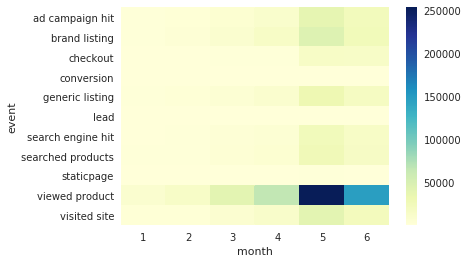

In [26]:
g = sns.heatmap(for_heatmap, cmap="YlGnBu")


In [27]:
for_heatmap.index

Index([u'ad campaign hit', u'brand listing', u'checkout', u'conversion',
       u'generic listing', u'lead', u'search engine hit', u'searched products',
       u'staticpage', u'viewed product', u'visited site'],
      dtype='object', name=u'event')

In [28]:
for_heatmap_log = grouped.pivot_table(index='event', columns='month', values='qty_log')

In [29]:
for_heatmap_log

month,1,2,3,4,5,6
event,,,,,,
ad campaign hit,7.440147,7.758333,8.835356,9.295508,10.548206,10.039678
brand listing,7.577634,8.039802,9.046644,9.626020,10.714240,10.124589
checkout,5.805135,6.091310,7.234898,7.583756,9.657971,9.544524
conversion,4.158883,4.317488,5.583496,5.758902,5.863631,4.644391
generic listing,7.451242,7.620215,8.622274,9.200492,10.324596,9.789759
lead,3.496508,3.135494,4.248495,4.919981,4.499810,4.615121
search engine hit,6.911747,7.199678,8.098035,8.637994,10.096584,9.644069
searched products,7.201916,7.318540,8.296796,8.819074,10.168886,9.703633
staticpage,4.934474,4.663439,6.109248,6.483107,7.318540,6.616065


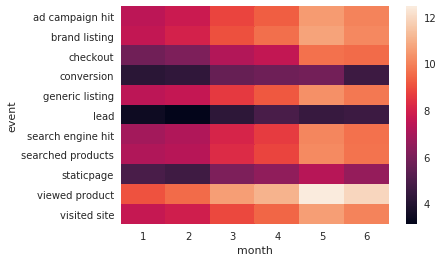

In [31]:
g = sns.heatmap(for_heatmap_log)